reference: [LUDOVICO CUOGHI](https://www.kaggle.com/ludovicocuoghi/h-m-deep-sales-and-customers-analysis#Q1---Which-are-the-TOP-100-articles-in-terms-of-sold-quantity?)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_customer = pd.read_csv('customers.csv')
df_customer['customer_id'] =\
    df_customer['customer_id'].apply(lambda x: int(x[-16:],16) ).astype('int64')

df_customer

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,6883939031699146327,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,-7200416642310594310,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,-6846340800584936,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,-94071612138601410,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,-283965518499174310,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,7551062398649767985,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,-9141402131989464905,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,-8286316756823862684,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,2551401172826382186,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [4]:
df_transaction = pd.read_csv('transactions_train.csv')
df_transaction['customer_id'] =\
    df_transaction['customer_id'].apply(lambda x: int(x[-16:],16) ).astype('int64')

df_transaction

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,-6846340800584936,663713001,0.050831,2
1,2018-09-20,-6846340800584936,541518023,0.030492,2
2,2018-09-20,-8334631767138808638,505221004,0.015237,2
3,2018-09-20,-8334631767138808638,685687003,0.016932,2
4,2018-09-20,-8334631767138808638,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,4685485978980270934,929511001,0.059305,2
31788320,2020-09-22,4685485978980270934,891322004,0.042356,2
31788321,2020-09-22,3959348689921271969,918325001,0.043203,1
31788322,2020-09-22,-8639340045377511665,833459002,0.006763,1


In [5]:
df_transaction = df_transaction[["customer_id", "article_id", "price"]]
df_transaction.head()

,customer_id,article_id,price
0,-6846340800584936,663713001,0.050831
1,-6846340800584936,541518023,0.030492
2,-8334631767138808638,505221004,0.015237
3,-8334631767138808638,685687003,0.016932
4,-8334631767138808638,685687004,0.016932


In [6]:
df_article = pd.read_csv('articles.csv')

df_article

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


## Getting Only Useful Features from Article Table

In [7]:
df_article = df_article[["article_id", "prod_name", "product_type_name", "product_group_name", "colour_group_name", "index_name"]]


df_article.head()

,article_id,prod_name,product_type_name,product_group_name,colour_group_name,index_name
0,108775015,Strap top,Vest top,Garment Upper body,Black,Ladieswear
1,108775044,Strap top,Vest top,Garment Upper body,White,Ladieswear
2,108775051,Strap top (1),Vest top,Garment Upper body,Off White,Ladieswear
3,110065001,OP T-shirt (Idro),Bra,Underwear,Black,Lingeries/Tights
4,110065002,OP T-shirt (Idro),Bra,Underwear,White,Lingeries/Tights


# Combine Transaction and Customer Tables

In [8]:
df_cust_trans = df_transaction.merge(df_customer, on=["customer_id"], how="inner")
df_cust_trans

,customer_id,article_id,price,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,-6846340800584936,663713001,0.050831,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
1,-6846340800584936,541518023,0.030492,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
2,-6846340800584936,663713001,0.050831,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,-6846340800584936,578020002,0.013542,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
4,-6846340800584936,723529001,0.025407,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
...,...,...,...,...,...,...,...,...,...
31788319,-7687230332281787421,903647001,0.050831,1.0,1.0,ACTIVE,Regularly,53.0,d5b28659d67f2d3f967c0e7e3dd9653fcc737087880546...
31788320,-7687230332281787421,903647001,0.050831,1.0,1.0,ACTIVE,Regularly,53.0,d5b28659d67f2d3f967c0e7e3dd9653fcc737087880546...
31788321,5804240836826735721,913597001,0.042356,NaN,NaN,ACTIVE,NONE,19.0,19b57d8db25e3620b7fbe3a3448e39307d62f2a91c5035...
31788322,5804240836826735721,903420001,0.033881,NaN,NaN,ACTIVE,NONE,19.0,19b57d8db25e3620b7fbe3a3448e39307d62f2a91c5035...


# Purchase Quantity By Age Group

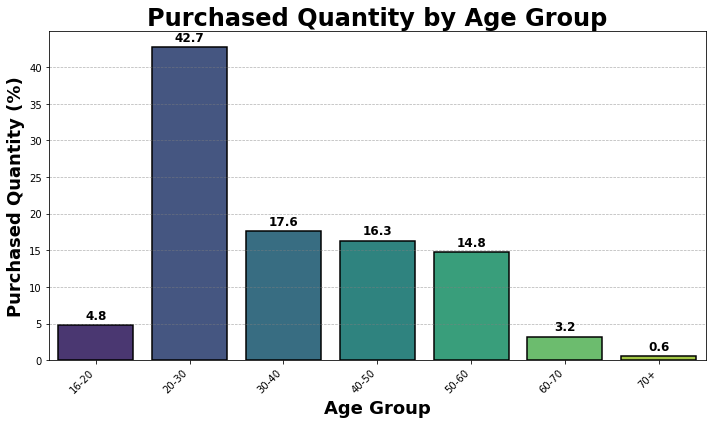

In [9]:
df_cust_trans['age_groups'] = pd.cut(df_cust_trans['age'], bins=[16, 20, 30, 40, 50, 60, 70, float('Inf')], 
                                     labels=['16-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+'])

plt.figure(figsize=(10, 6))
plt.title("Purchased Quantity by Age Group", fontweight="bold", size=24)

purchase_data = df_cust_trans.groupby("age_groups")["article_id"].sum().transform(lambda x: (x / x.sum() * 100)).rename('Purchased Quantity(%)').reset_index()

g = sns.barplot(x="age_groups", y="Purchased Quantity(%)", data=purchase_data, 
                palette="viridis", edgecolor="black", linewidth=1.5)

plt.xlabel("Age Group", fontweight="bold", size=18)
plt.ylabel("Purchased Quantity (%)", fontweight="bold", size=18)

for container in g.containers:
    g.bar_label(container, padding=3, fmt='%.1f', fontsize=12, fontweight='bold')

plt.grid(axis="y", color='grey', linestyle='--', linewidth=0.7, alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Getting the Number of Sold Items per Article_id

In [10]:
df_sold_qty = df_transaction["article_id"].value_counts()
df_sold_qty

706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
             ...  
520736002        1
619777003        1
586904003        1
512385003        1
533261032        1
Name: article_id, Length: 104547, dtype: int64

In [11]:
df_sold_qty=df_sold_qty.reset_index()
df_sold_qty.rename(columns = {"article_id":"sold_qty","index":"article_id"}, inplace=True)
df_sold_qty.head()

,article_id,sold_qty
0,706016001,50287
1,706016002,35043
2,372860001,31718
3,610776002,30199
4,759871002,26329


In [12]:
df_sold_qty["sold_qty"].describe()

count    104547.000000
mean        304.057735
std         791.266060
min           1.000000
25%          14.000000
50%          65.000000
75%         286.000000
max       50287.000000
Name: sold_qty, dtype: float64

In [13]:
top_150_sold = df_sold_qty.iloc[:150]
top_150_sold.head()

,article_id,sold_qty
0,706016001,50287
1,706016002,35043
2,372860001,31718
3,610776002,30199
4,759871002,26329


In [16]:
top_150_details = top_150_sold.merge(df_article, on="article_id", how="inner")

top_150_details.head()

,article_id,sold_qty,prod_name,product_type_name,product_group_name,colour_group_name,index_name
0,706016001,50287,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Black,Divided
1,706016002,35043,Jade HW Skinny Denim TRS,Trousers,Garment Lower body,Light Blue,Divided
2,372860001,31718,7p Basic Shaftless,Socks,Socks & Tights,Black,Lingeries/Tights
3,610776002,30199,Tilly (1),T-shirt,Garment Upper body,Black,Ladieswear
4,759871002,26329,Tilda tank,Vest top,Garment Upper body,Black,Divided


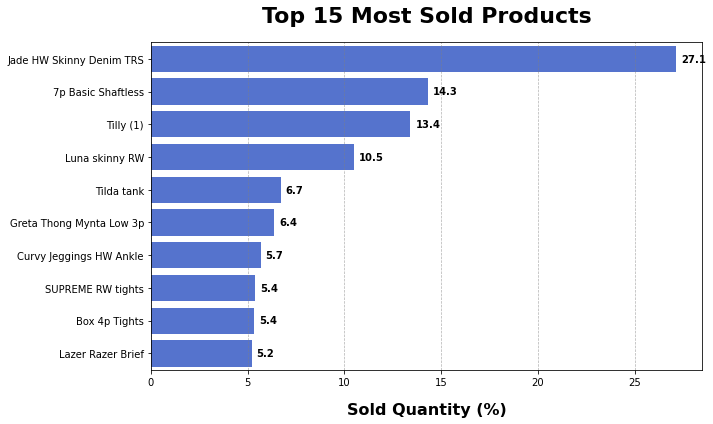

In [17]:
plt.figure(figsize=(10, 6))
plt.title("Top 15 Most Sold Products", fontsize=22, fontweight="bold", pad=20)

data = top_150_details.iloc[:15].groupby("prod_name")["sold_qty"].sum() \
    .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index() \
    .sort_values(by="sold_qty(%)", ascending=False)

g = sns.barplot(y="prod_name", x="sold_qty(%)", data=data, color="#4169E1", ci=False)

for container in g.containers:
    g.bar_label(container, padding=5, fmt='%.1f', fontsize=10, fontweight='bold')

plt.xlabel("Sold Quantity (%)", size=16, fontweight="bold", labelpad=15)
plt.ylabel("")
plt.grid(axis="x", color='grey', linestyle='--', linewidth=0.7, alpha=0.6)
plt.tight_layout()
plt.show()

# The Most Sold Products per Selected Features

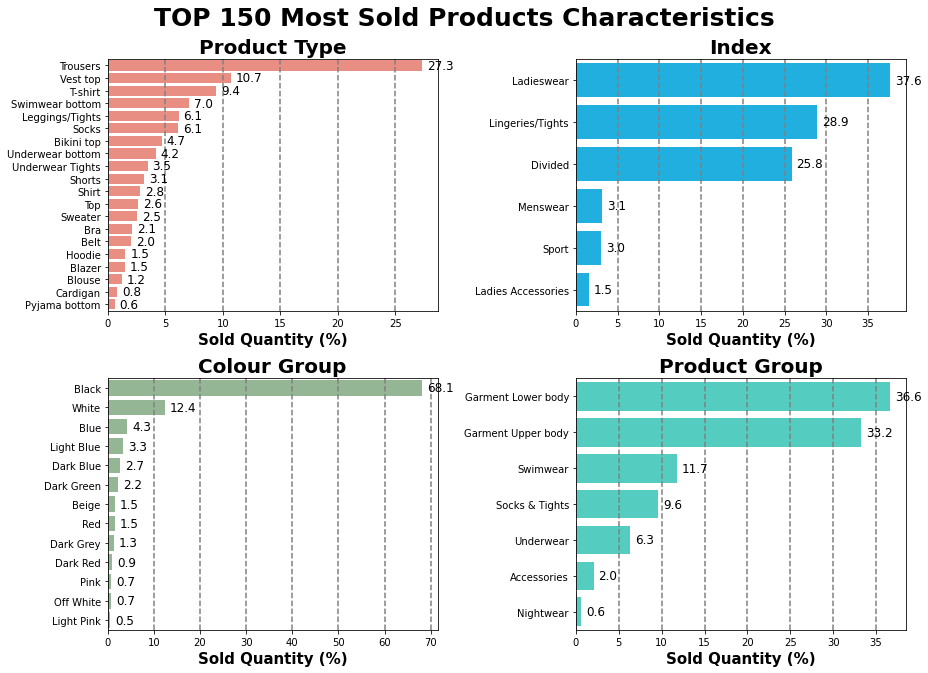

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(13, 9.5))
plt.suptitle("TOP 150 Most Sold Products Characteristics", fontweight="bold", fontsize=25)

no = 150
features = ["product_type_name", "index_name", "colour_group_name", "product_group_name"]
titles = ["Product Type", "Index", "Colour Group", "Product Group"]
colors = ["salmon", "deepskyblue", "darkseagreen", "turquoise"]

for i, (feature, title, color) in enumerate(zip(features, titles, colors)):
    row, col = divmod(i, 2)
    data = top_150_details.iloc[:no].groupby(feature)["sold_qty"].sum() \
        .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index() \
        .sort_values(by="sold_qty(%)", ascending=False)
    
    g = sns.barplot(y=feature, x="sold_qty(%)", data=data, ax=ax[row, col], color=color, ci=False)
    
    for container in g.containers:
        g.bar_label(container, padding=5, fmt='%.1f', fontsize=12, color="black")
    
    ax[row, col].set_ylabel("")
    ax[row, col].set_xlabel("Sold Quantity (%)", size=15, fontweight="bold")
    ax[row, col].set_title(title, fontweight="bold", fontsize=20)
    ax[row, col].grid(axis="x", color='grey', linestyle='--', linewidth=1.5)

fig.tight_layout()
plt.show()